### Setting paths and imports

In [2]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL'

In [3]:
os.chdir(module_path)

In [4]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer 

In [4]:
config_f_name = 'E13-TCR-128-28_TCO_Ensemble-Stochastic.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info("Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/2-TCR-128-28-0.25_TCO_OBS.jsonc
2024-06-14 12:35:21,374403023 | INFO | 1898654 - Executing: /NFSHOME/mprado/AIIM/GRETEL/silver/GRETEL/lab/config/2-TCR-128-28-0.25_TCO_OBS.jsonc Run: 1
2024-06-14 12:35:21,374403032 | INFO | 1898654 - Creating the evaluation manager....................................
2024-06-14 12:35:21,374403040 | INFO | 1898654 - Creating the paired  evaluators.....................................
2024-06-14 12:35:21,374403068 | INFO | 1898654 - Created: explanation_runtime
2024-06-14 12:35:21,374403098 | INFO | 1898654 - Created: graph_edit_distance
2024-06-14 12:35:21,374403124 | INFO | 1898654 - Created: correctness
2024-06-14 12:35:21,374403143 | INFO | 1898654 - Created: oracle_calls
2024-06-14 12:35:21,374403161 | INFO | 1898654 - Created: oracle_accuracy
2024-06-14 12:35:21,374403180 | INFO | 1898654 - Created: sparsity
2024-06-14 12:35:21,374403208 | INFO | 1898654 - Created: sparsity

### Aggregating the stats

In [5]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,RuntimeMetric,RuntimeMetric-std,GraphEditDistanceMetric,GraphEditDistanceMetric-std,CorrectnessMetric,CorrectnessMetric-std,OracleCallsMetric,OracleCallsMetric-std,OracleAccuracyMetric,OracleAccuracyMetric-std,SparsityMetric,SparsityMetric-std,FidelityMetric,FidelityMetric-std,InstabilityMetric,InstabilityMetric-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,IRandExplainer,0.022724,0.001556,3.993333,0.878357,0.258333,0.106728,32.322436,1.745036,0.992308,0.023077,0.066746,0.014058,0.242949,0.119872,1.027987,0.025973
1,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationBidirectionalSearch,0.922018,0.282142,2.214744,0.625079,0.992308,0.023077,1204.441026,438.987891,0.992308,0.023077,0.044950,0.022118,0.992308,0.023077,1.006597,0.013543
2,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationFrequency,0.797352,0.176952,2.627500,0.946735,0.321154,0.118701,1205.758333,269.520103,0.984615,0.030769,0.051771,0.020767,0.321154,0.118701,0.959062,0.009041
3,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationUnion,0.688741,0.194586,25.124053,0.308670,0.888462,0.127537,1072.339103,289.620831,0.992308,0.023077,0.450852,0.006475,0.888462,0.127537,1.038358,0.068299
4,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ObliviousBidirectionalSearchExplainer,0.163408,0.068104,5.301923,1.367527,0.969231,0.037684,291.103205,83.220716,0.992308,0.023077,0.093917,0.019320,0.953846,0.051025,1.063447,0.042740
5,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationRandom,0.700337,0.172929,1.974160,0.577582,0.812179,0.195698,1097.890385,279.813012,0.992308,0.023077,0.035910,0.010547,0.796795,0.198450,0.990150,0.016322
6,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationTopSelect,0.715987,0.188236,6.098077,1.531464,1.000000,0.000000,1104.637179,311.802886,0.992308,0.023077,0.119026,0.039180,0.984615,0.046154,1.032766,0.043734
7,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,RSGG,0.375855,0.107155,13.807639,5.703742,0.437179,0.171450,552.979487,162.622000,0.984615,0.030769,0.365462,0.194272,0.421795,0.153868,0.774134,0.114767
8,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationStochasticAggregator,1.174132,0.718042,7.179307,3.144064,0.807692,0.282110,1796.208974,1392.846804,0.946154,0.137819,0.143051,0.067785,0.792308,0.279581,0.966825,0.061643
9,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,OracleTorch-737382b5cd5d41796e7e81d9005aba02,ExplanationIntersection,0.740435,0.119236,1.363333,0.784956,0.231410,0.164394,1223.271795,273.263792,0.992308,0.023077,0.025846,0.015027,0.231410,0.164394,0.963370,0.007665


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [1]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

NameError: name 'evaluator' is not defined

In [9]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [10]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: []
removed_edges: [(24, 25)]
added nodes: []
removed nodes: []


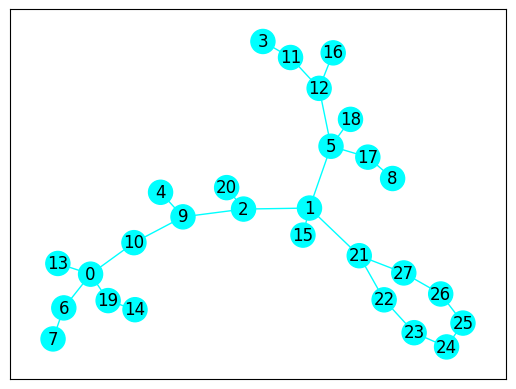

In [14]:
pos = data_analyzer.draw_graph(og_inst)

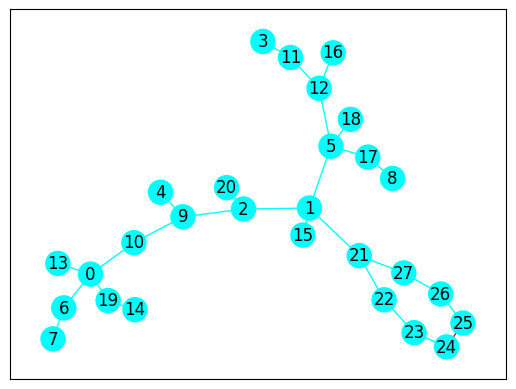

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)